<h1>Cool Maths</h1>

<h2>Local Expensive Min</h2>
<h3>Libraries</h3>

In [4]:
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import pprint
import asyncio
import scipy
import math
import bisect

from matplotlib import gridspec
from scipy import optimize as opt
from scipy.interpolate import interp1d

%reload_ext blackcellmagic


<h3>Functions</h3>

In [20]:
def f(x):
    return np.sin(x) + 0.05 * x ** 2
    

def slow(x):
    #await asyncio.sleep(0.01)
    y = f(x)
    return y * (1 - np.random.normal(size=np.size(y)) * 0.1)


def fit(X, Y):
    if X.size == 2:
        return interp1d(X, Y)
    if X.size == 3:
        return interp1d(X, Y)
    return interp1d(X, Y, kind="cubic")


async def uncertainty(fit, limits, X, x):
    async def height(fit, limits, x=None):
        if x is None:
            x = np.linspace(*limits, 50)
        y = fit(x)
        y -= y.min()
        y *= 9.9 / y.max()
        return (10 - y)**2.5

    async def sparcity(fit, limits, X, x=None):
        if x is None:
            x = np.linspace(*limits, 50)
        index = 0
        prob = np.zeros_like(x)
        for j, point in enumerate(x):
            if point == X[index]:
                continue
            else:
                while point > X[index]:
                    index += 1
                prob[j] = min(X[index] - point, point - X[index - 1])
        prob *= 100 / prob.max()
        return prob

    probY = height(approx, limits, x)
    probX = sparcity(approx, limits, X, x)
    return await (probY) * await (probX)


This Method = -1.6983934291007345
fminbound with same number of iterations = [-1.64121974]
fminbound with 500 iterations max = -1.427552619970902


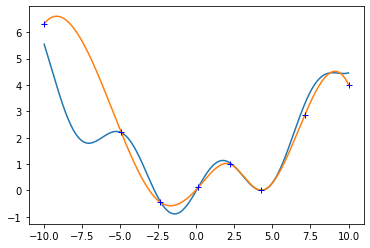

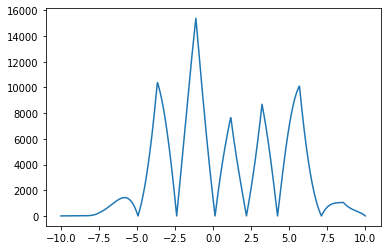

In [22]:
limits = np.array([-10, 10], dtype=float)
funIt = 6
x = np.linspace(*limits, 1000)
plt.figure(0)
plt.plot(x, f(x))

X = limits
Y = slow(limits)

for i in range(funIt):
    approx = fit(X, Y)

    error = await uncertainty(fit, limits, X, x)
    nxt = np.argmax(error)

    index = bisect.bisect(X, x[nxt])
    X = np.insert(X, index, x[nxt])
    Y = np.insert(Y, index, slow(x[nxt]))

approx = fit(X, Y)
error = await uncertainty(approx, limits, X, x)

plt.figure(0)
plt.plot(x, approx(x))
plt.figure(0)
plt.plot(X, Y, "b+")
plt.figure(1)
plt.plot(x, error)

print(f"This Method = {opt.fminbound(approx, *limits, disp = 0)}")
print(f"fminbound with same number of iterations = {opt.fminbound(slow, *limits, disp = 0, maxfun = funIt)}")
print(f"fminbound with 500 iterations max = {opt.fminbound(f, *limits, disp = 0)}")

In [7]:
X.size

8

x